In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

MY BUSINESS QUESTIONS
1. Is there a difference in attrition between departments?   # To spot which departments lose more staff
2. Do employees who work overtime leave more often?   # To understand if overtime is a retention issue
3. How does job satisfaction relate to attrition?   # To identify if dissatisfied employees are quitting
4. Is there a pattern between years at company and attrition?   # To identify exactly when people tend to leave
5. Do younger employees leave more often than older ones?   # To see if retention strategies can be tailored by age group
6. Is there a relationship between income and attrition?   # Exploring if pay impacts quitting decisions
7. Which job roles have the highest attrition rates?   # Target roles for HR support or policy change
8. Do people with more job involvement tend to stay?   # To determine if involvement affects retention
9. How does work-life balance affect attrition?   # To assess if better balance equals less attrition
10. Are employees who have worked at more companies more likely to leave?   # To determine risk based on job history


In [35]:
attrition_df = pd.read_csv (r'C:\Users\diplo\Desktop\Ind_Project\AttritionRate\IBM_HR_Analytics.csv')

In [36]:
attrition_df.head(10)
# An initial look at the column names and the kind of data I am dealing with
# I will be using the following columns for my analysis

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [37]:
attrition_df.tail(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


COLUMNS TO WORK WITH, GROUPED BY THEME
1. Target Variable (Attrition → Whether the employee left the company (Yes/No))
2. Demographics (Age, Gender, MaritalStatus)
3. Job-Related Info (JobRole, Department, BusinessTravel, DistanceFromHome, OverTime, YearsAtCompany, YearsInCurrentRole, JobSatisfaction (1 to 4), WorkLifeBalance (1 to 4), JobLevel, YearsSinceLastPromotion)
4. Compensation (MonthlyIncome, PercentSalaryHike, StockOptionLevel)
5. Performance & Tenure (PerformanceRating, TotalWorkingYears, NumCompaniesWorked)



In [38]:
attrition_filtered = attrition_df[['Attrition', 'Age', 'Gender', 'MaritalStatus', 'JobRole', 'Department', 'DistanceFromHome',
                  'BusinessTravel', 'OverTime', 'YearsAtCompany', 'YearsInCurrentRole',
                  'JobSatisfaction', 'WorkLifeBalance', 'JobLevel', 'MonthlyIncome',
                  'PercentSalaryHike', 'StockOptionLevel', 'PerformanceRating',
                  'TotalWorkingYears', 'NumCompaniesWorked', 'YearsSinceLastPromotion',]]
# I will be using the following columns for my analysis

In [39]:
attrition_filtered.head(10)

,Attrition,Age,Gender,MaritalStatus,JobRole,Department,DistanceFromHome,BusinessTravel,OverTime,YearsAtCompany,...,JobSatisfaction,WorkLifeBalance,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,PerformanceRating,TotalWorkingYears,NumCompaniesWorked,YearsSinceLastPromotion
0,Yes,41,Female,Single,Sales Executive,Sales,1,Travel_Rarely,Yes,6,...,4,1,2,5993,11,0,3,8,8,0
1,No,49,Male,Married,Research Scientist,Research & Development,8,Travel_Frequently,No,10,...,2,3,2,5130,23,1,4,10,1,1
2,Yes,37,Male,Single,Laboratory Technician,Research & Development,2,Travel_Rarely,Yes,0,...,3,3,1,2090,15,0,3,7,6,0
3,No,33,Female,Married,Research Scientist,Research & Development,3,Travel_Frequently,Yes,8,...,3,3,1,2909,11,0,3,8,1,3
4,No,27,Male,Married,Laboratory Technician,Research & Development,2,Travel_Rarely,No,2,...,2,3,1,3468,12,1,3,6,9,2
5,No,32,Male,Single,Laboratory Technician,Research & Development,2,Travel_Frequently,No,7,...,4,2,1,3068,13,0,3,8,0,3
6,No,59,Female,Married,Laboratory Technician,Research & Development,3,Travel_Rarely,Yes,1,...,1,2,1,2670,20,3,4,12,4,0
7,No,30,Male,Divorced,Laboratory Technician,Research & Development,24,Travel_Rarely,No,1,...,3,3,1,2693,22,1,4,1,1,0
8,No,38,Male,Single,Manufacturing Director,Research & Development,23,Travel_Frequently,No,9,...,3,3,3,9526,21,0,4,10,0,1
9,No,36,Male,Married,Healthcare Representative,Research & Development,27,Travel_Rarely,No,7,...,3,2,2,5237,13,2,3,17,6,7


In [40]:
attrition_filtered.tail(5)

,Attrition,Age,Gender,MaritalStatus,JobRole,Department,DistanceFromHome,BusinessTravel,OverTime,YearsAtCompany,...,JobSatisfaction,WorkLifeBalance,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,PerformanceRating,TotalWorkingYears,NumCompaniesWorked,YearsSinceLastPromotion
1465,No,36,Male,Married,Laboratory Technician,Research & Development,23,Travel_Frequently,No,5,...,4,3,2,2571,17,1,3,17,4,0
1466,No,39,Male,Married,Healthcare Representative,Research & Development,6,Travel_Rarely,No,7,...,1,3,3,9991,15,1,3,9,4,1
1467,No,27,Male,Married,Manufacturing Director,Research & Development,4,Travel_Rarely,Yes,6,...,2,3,2,6142,20,1,4,6,1,0
1468,No,49,Male,Married,Sales Executive,Sales,2,Travel_Frequently,No,9,...,2,2,2,5390,14,0,3,17,2,0
1469,No,34,Male,Married,Laboratory Technician,Research & Development,8,Travel_Rarely,No,4,...,3,4,2,4404,12,0,3,6,2,1


In [41]:
attrition_filtered.shape

(1470, 21)

In [42]:
attrition_filtered.describe()
# To check the ouliers and understand the spread of numeric data

,Age,DistanceFromHome,YearsAtCompany,YearsInCurrentRole,JobSatisfaction,WorkLifeBalance,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,PerformanceRating,TotalWorkingYears,NumCompaniesWorked,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,7.008163,4.229252,2.728571,2.761224,2.063946,6502.931293,15.209524,0.793878,3.153741,11.279592,2.693197,2.187755
std,9.135373,8.106864,6.126525,3.623137,1.102846,0.706476,1.106940,4707.956783,3.659938,0.852077,0.360824,7.780782,2.498009,3.222430
min,18.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1009.000000,11.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2911.000000,12.000000,0.000000,3.000000,6.000000,1.000000,0.000000
50%,36.000000,7.000000,5.000000,3.000000,3.000000,3.000000,2.000000,4919.000000,14.000000,1.000000,3.000000,10.000000,2.000000,1.000000
75%,43.000000,14.000000,9.000000,7.000000,4.000000,3.000000,3.000000,8379.000000,18.000000,1.000000,3.000000,15.000000,4.000000,3.000000
max,60.000000,29.000000,40.000000,18.000000,4.000000,4.000000,5.000000,19999.000000,25.000000,3.000000,4.000000,40.000000,9.000000,15.000000


ANALYSIS: The average Age is around 37 years, ranging from 18 to 60. Monthly Income varies widely, with an average of about 6,500 and a maximum close to 20,000, indicating a significant income disparity. On average, employees have spent about 7 years at the company and 11 years in total working experience. Most employees have worked at around 2 to 3 companies, with a maximum of 9. Job satisfaction and work-life balance tend to cluster around 2 to 3 on a 1–4 scale. The average job level is about 2, with a maximum of 5, while stock options and performance ratings are relatively stable across the dataset.

In [43]:
attrition_filtered.info()
# To identify which columns are categorical vs numerical, and which might need cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Attrition                1470 non-null   object
 1   Age                      1470 non-null   int64 
 2   Gender                   1470 non-null   object
 3   MaritalStatus            1470 non-null   object
 4   JobRole                  1470 non-null   object
 5   Department               1470 non-null   object
 6   DistanceFromHome         1470 non-null   int64 
 7   BusinessTravel           1470 non-null   object
 8   OverTime                 1470 non-null   object
 9   YearsAtCompany           1470 non-null   int64 
 10  YearsInCurrentRole       1470 non-null   int64 
 11  JobSatisfaction          1470 non-null   int64 
 12  WorkLifeBalance          1470 non-null   int64 
 13  JobLevel                 1470 non-null   int64 
 14  MonthlyIncome            1470 non-null  

ANALYSIS: This output shows the structure of the DataFrame. It contains 1,470 entries (rows) and 21 columns in total. The dataset includes both numerical and categorical variables. There are 14 numerical columns (e.g., Age, MonthlyIncome, YearsAtCompany) and 7 categorical columns (e.g., Attrition, Gender, Department, OverTime). All columns are complete with no missing values. The dataset is clean.

In [44]:
attrition_filtered.isnull().sum()
# There are no null values in the dataset
# I will now check for duplicates

Attrition                  0
Age                        0
Gender                     0
MaritalStatus              0
JobRole                    0
Department                 0
DistanceFromHome           0
BusinessTravel             0
OverTime                   0
YearsAtCompany             0
YearsInCurrentRole         0
JobSatisfaction            0
WorkLifeBalance            0
JobLevel                   0
MonthlyIncome              0
PercentSalaryHike          0
StockOptionLevel           0
PerformanceRating          0
TotalWorkingYears          0
NumCompaniesWorked         0
YearsSinceLastPromotion    0
dtype: int64

ANALYSIS: There are no null values in the dataset

In [45]:
attrition_filtered.duplicated().sum()
# There are no duplicates in the dataset
# I will now check the data types of the columns

0

ANALYSIS: There are no duplicated values

In [46]:
attrition_filtered.dtypes


Attrition                  object
Age                         int64
Gender                     object
MaritalStatus              object
JobRole                    object
Department                 object
DistanceFromHome            int64
BusinessTravel             object
OverTime                   object
YearsAtCompany              int64
YearsInCurrentRole          int64
JobSatisfaction             int64
WorkLifeBalance             int64
JobLevel                    int64
MonthlyIncome               int64
PercentSalaryHike           int64
StockOptionLevel            int64
PerformanceRating           int64
TotalWorkingYears           int64
NumCompaniesWorked          int64
YearsSinceLastPromotion     int64
dtype: object

ANALYSIS: There are 14 numerical columns (Int) and 7 categorical columns (object). All columns are complete with no missing values.

In [47]:
cat = attrition_filtered.select_dtypes(exclude="number")
num = attrition_filtered.select_dtypes(include="number")
print(cat.columns)
print(num.columns)

Index(['Attrition', 'Gender', 'MaritalStatus', 'JobRole', 'Department',
       'BusinessTravel', 'OverTime'],
      dtype='object')
Index(['Age', 'DistanceFromHome', 'YearsAtCompany', 'YearsInCurrentRole',
       'JobSatisfaction', 'WorkLifeBalance', 'JobLevel', 'MonthlyIncome',
       'PercentSalaryHike', 'StockOptionLevel', 'PerformanceRating',
       'TotalWorkingYears', 'NumCompaniesWorked', 'YearsSinceLastPromotion'],
      dtype='object')


In [48]:
# To determine whether there is a significant association between two categorical variables, i used the Chi-Squared test of independence.
# if p-value < 0.05, this suggests that there is a significant association between the categorical variables.
# if p-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables.

from scipy.stats import chi2_contingency

# Contingency table for Attrition vs OverTime
table = pd.crosstab(attrition_filtered['Attrition'], attrition_filtered['OverTime'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-Square:", chi2)
print("P-Value:", p)


Chi-Square: 87.56429365828768
P-Value: 8.15842372153832e-21


ANALYSIS: 
Using the Chi-Square Test of Independence, the result shows a statistically significant relationship between Attrition and OverTime (Chi² = 87.56, p < 0.001). This suggests that working overtime may contribute to employee attrition and should be investigated further by HR for workload or burnout issues.



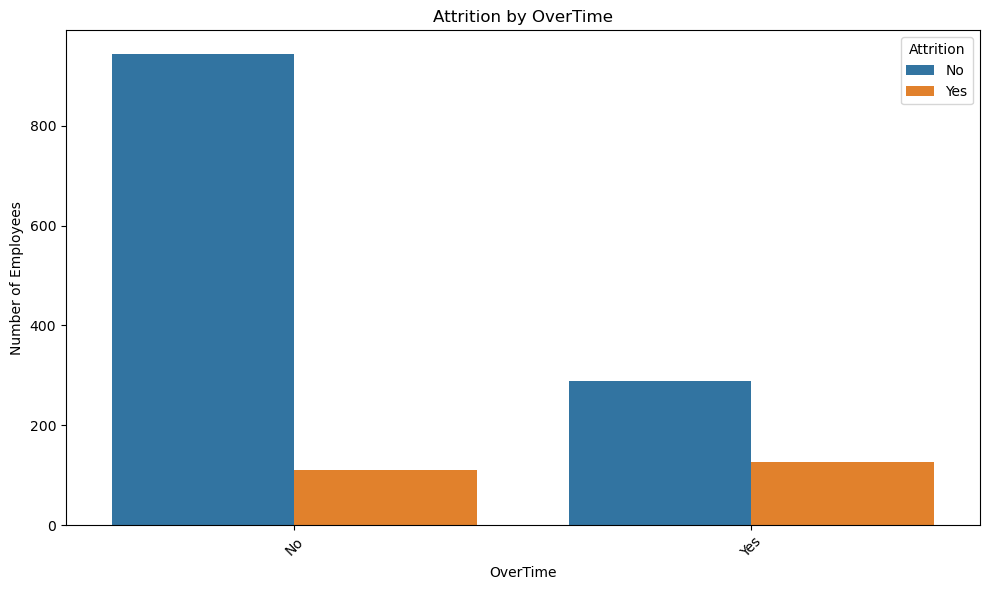

In [49]:
Over_attrition = attrition_filtered.groupby(['OverTime', 'Attrition']).size().reset_index(name='Count')

plt.figure(figsize=(10,6))
sns.barplot(data=Over_attrition, x='OverTime', y='Count', hue='Attrition')
plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

In [50]:
from scipy.stats import chi2_contingency

# Contingency table for Attrition vs Department
table2 = pd.crosstab(attrition_filtered['Attrition'], attrition_filtered['Department'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(table2)

print("Chi-Square:", chi2)
print("P-Value:", p)

Chi-Square: 10.79600732241067
P-Value: 0.004525606574479633


ANALYSIS: A Chi-Square test between Attrition and Department shows a significant relationship (Chi² = 10.80, p = 0.0045). This indicates that employee attrition is not evenly distributed across departments, and certain departments may require targeted retention strategies.

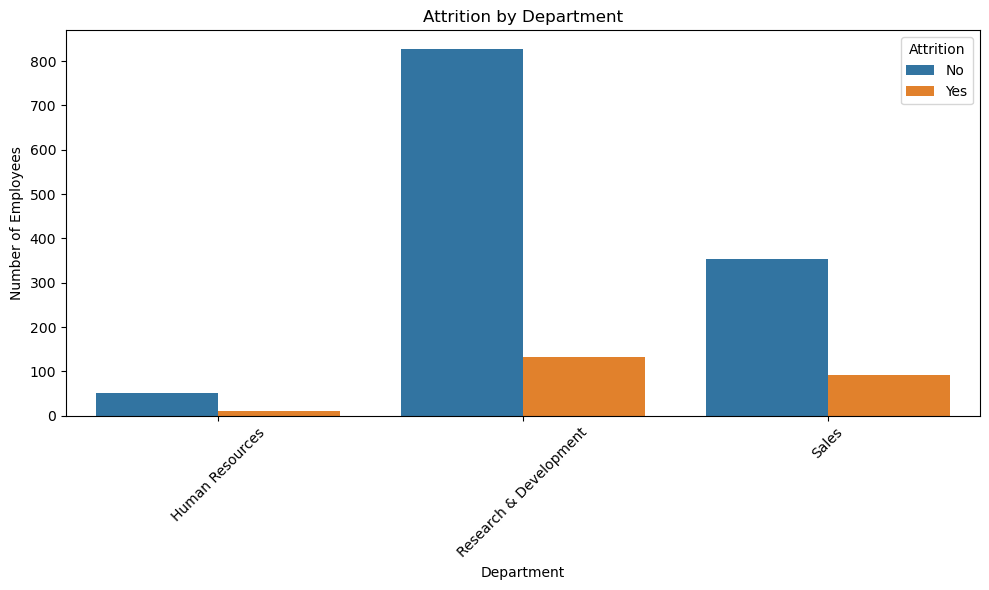

In [51]:
dept_attrition = attrition_filtered.groupby(['Department', 'Attrition']).size().reset_index(name='Count')

plt.figure(figsize=(10,6))
sns.barplot(data=dept_attrition, x='Department', y='Count', hue='Attrition')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

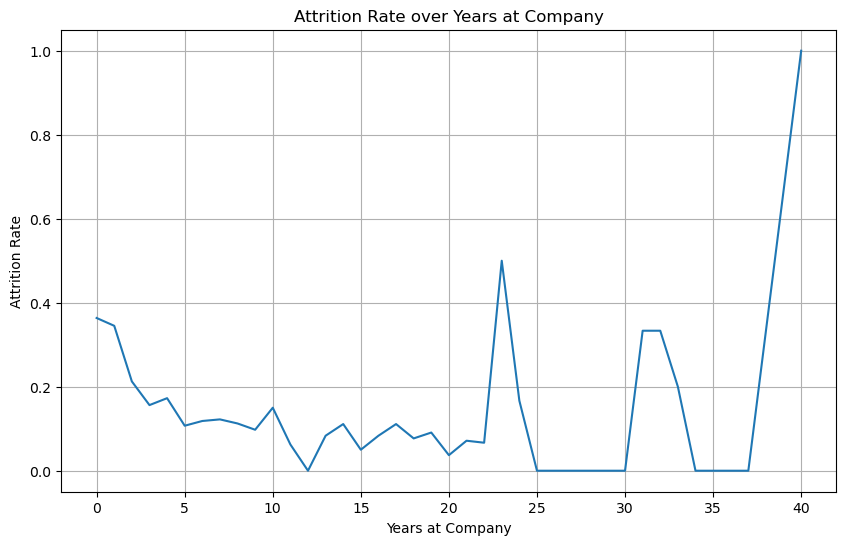

In [52]:
# This plot is to understand how employee retention evolves over the years at the company
evolution = attrition_filtered.groupby('YearsAtCompany')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
evolution['AttritionRate'] = evolution['Yes']

plt.figure(figsize=(10,6))
sns.lineplot(x=evolution.index, y=evolution['AttritionRate'])
plt.title("Attrition Rate over Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Attrition Rate")
plt.grid(True)
plt.show()

ANALYSIS: 
The line plot result reveals that employees are most likely to leave within their first four years, particularly in the first year. After this initial period, attrition rates tend to stabilize and remain consistently low through mid-tenure (years 5 to 20), suggesting stronger employee retention during this phase. However, there are noticeable spikes in attrition at later stages, such as year 23 and year 40, which could be attributed to retirement or a small number of employees in those categories. These findings highlight the importance of focusing retention efforts on new hires and monitoring long-tenured employees for potential exits.

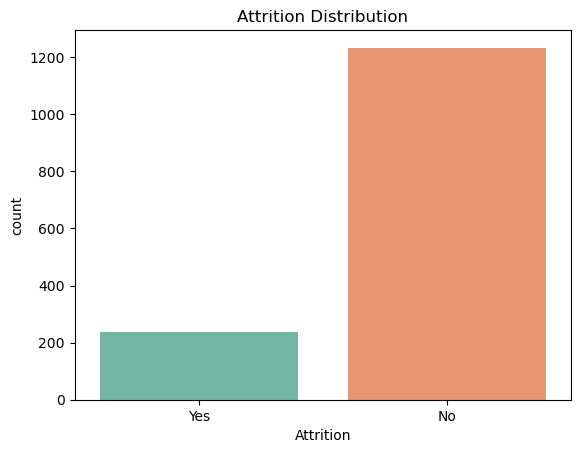

In [53]:
# The Target variable is 'Attrition' which is a categorical variable
# I will now check the distribution of the target variable
sns.countplot(x='Attrition', data=attrition_filtered, palette='Set2', hue='Attrition', legend=False)
plt.title('Attrition Distribution')
plt.show()
# The distribution of the target variable is imbalanced
# I will now check the distribution of the other categorical variables
#Yes = left the company, No = still working.

ANALYSIS: Above Countplot of Attrition shows that around 16% left the company, and 84% stayed.

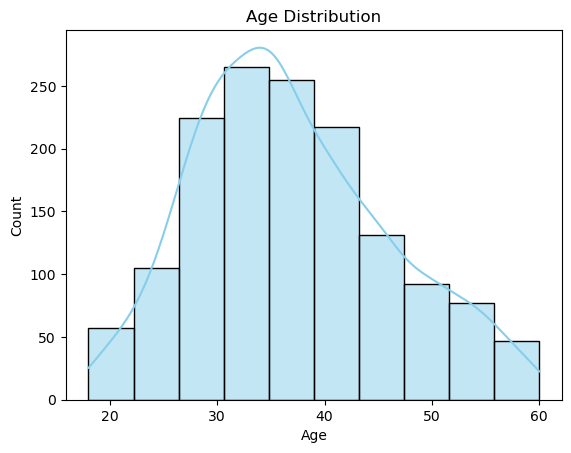

In [54]:
sns.histplot(attrition_filtered['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

ANALYSIS: In order to understand the age profile of the workforce, Histogram of Age above shows most employees are in their 30s to early 40s.

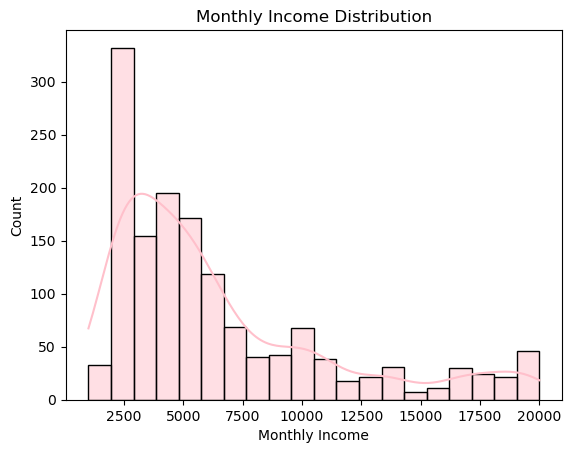

In [55]:
sns.histplot(attrition_filtered['MonthlyIncome'], bins=20, kde=True, color='pink')
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.show()

ANALYSIS: In order to identify income inequality or outlier, the Histogram of Monthly Income above shows that income is right_skewed. A few employees earn much more

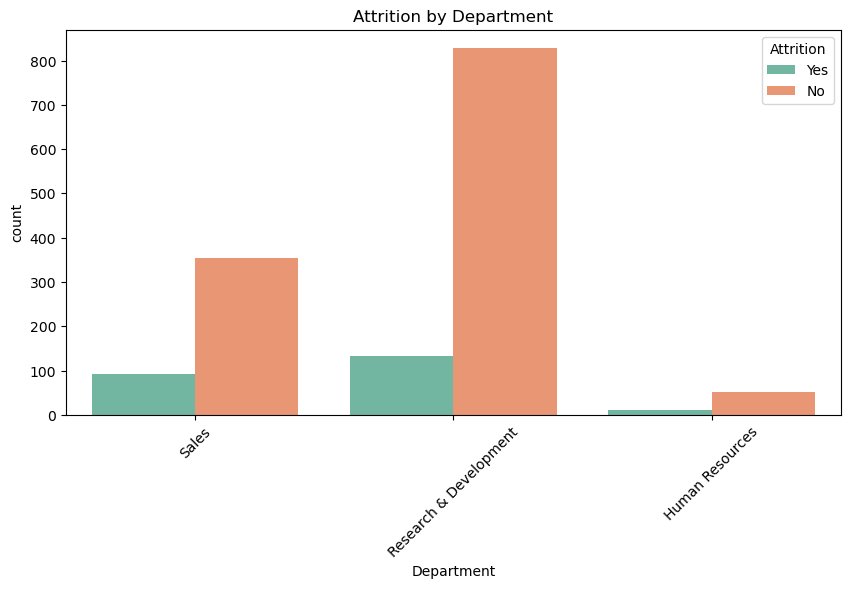

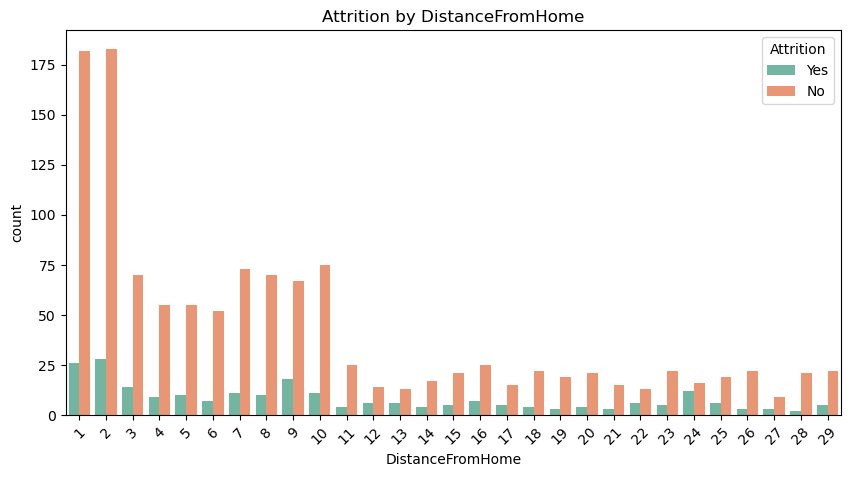

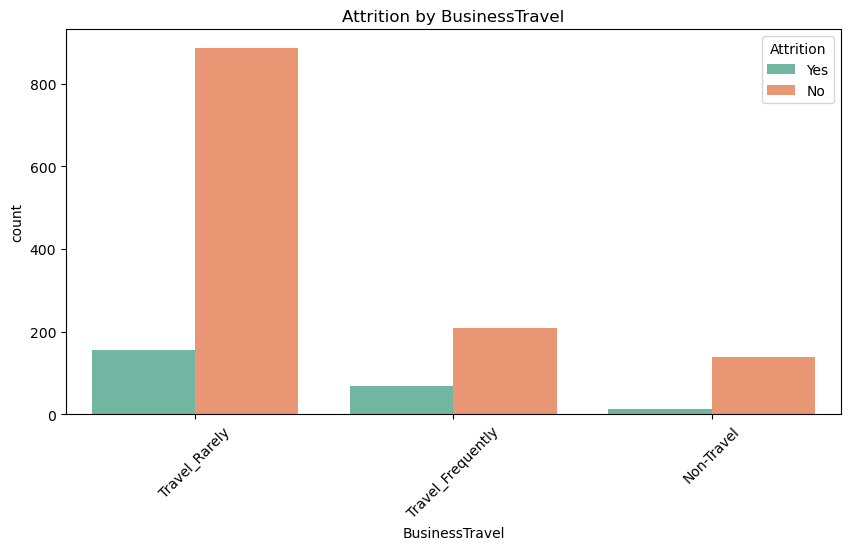

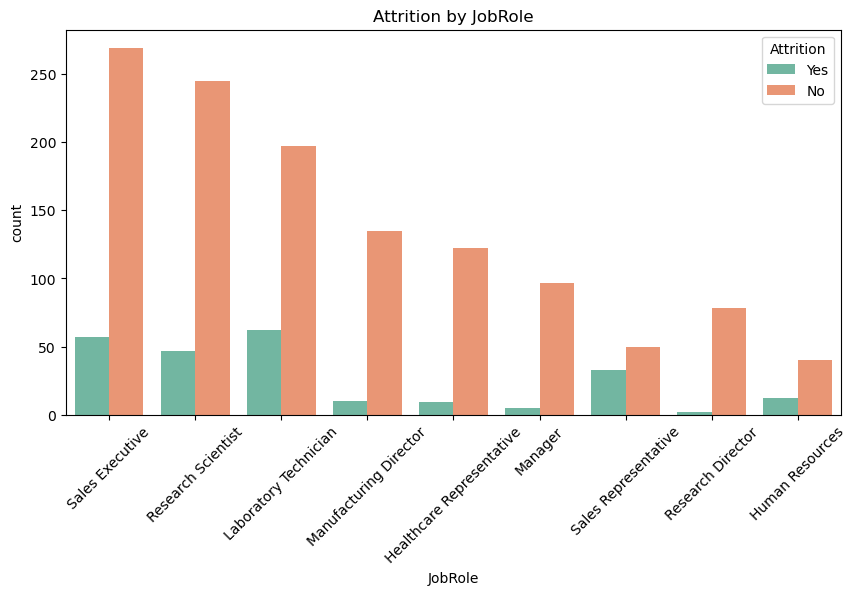

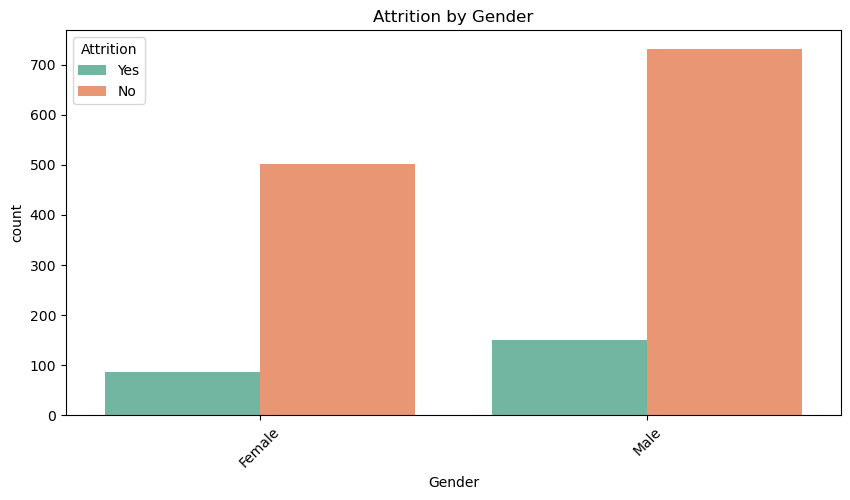

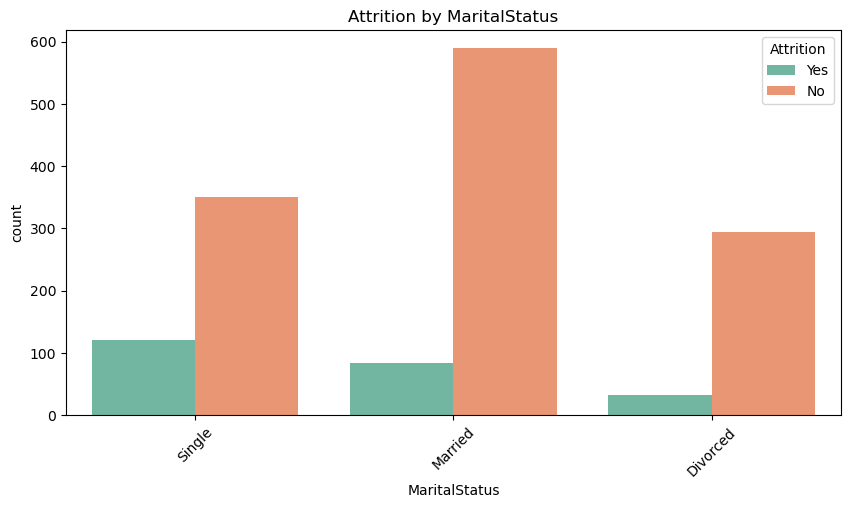

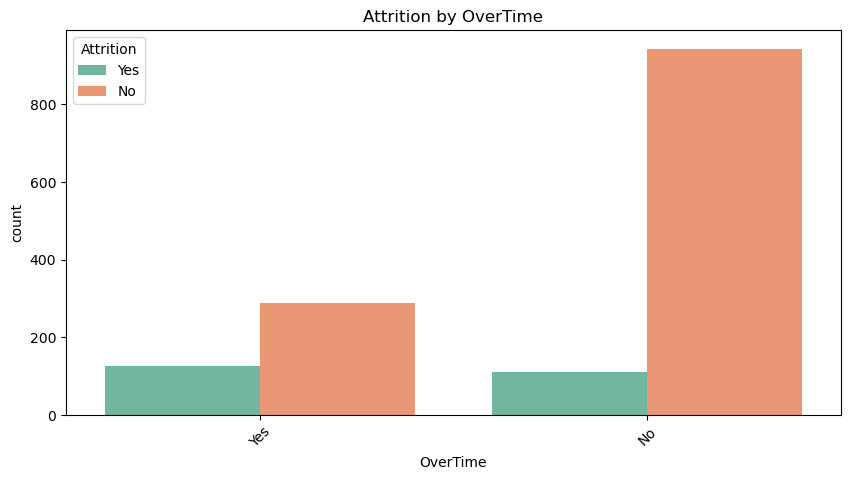

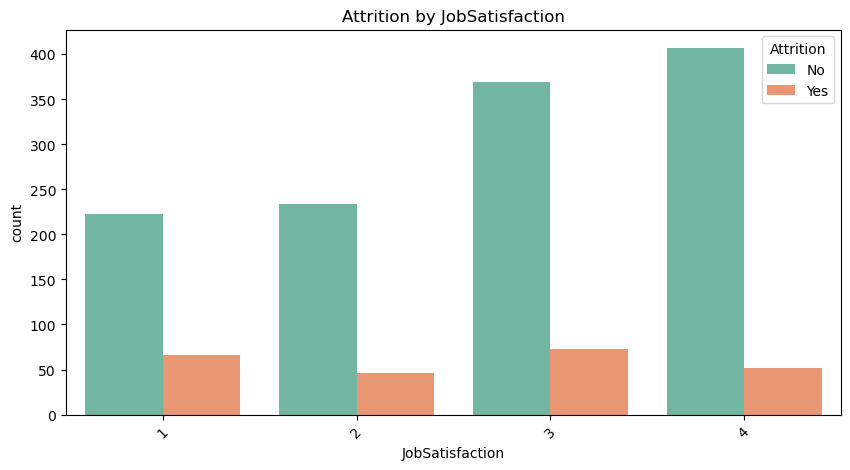

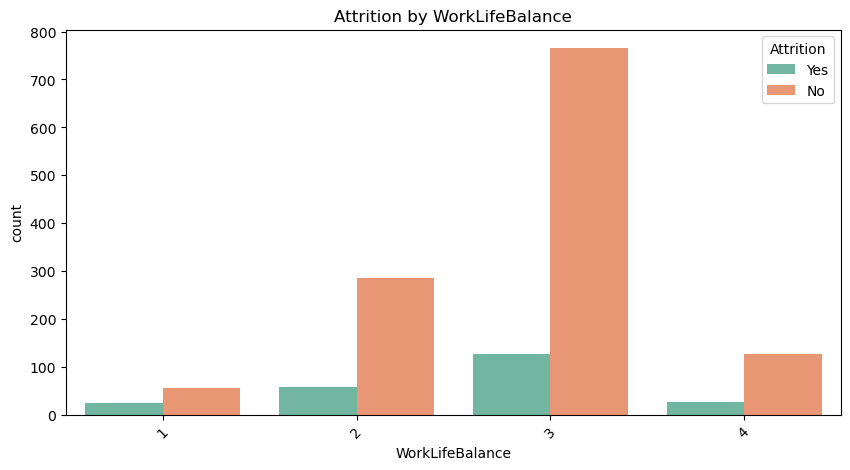

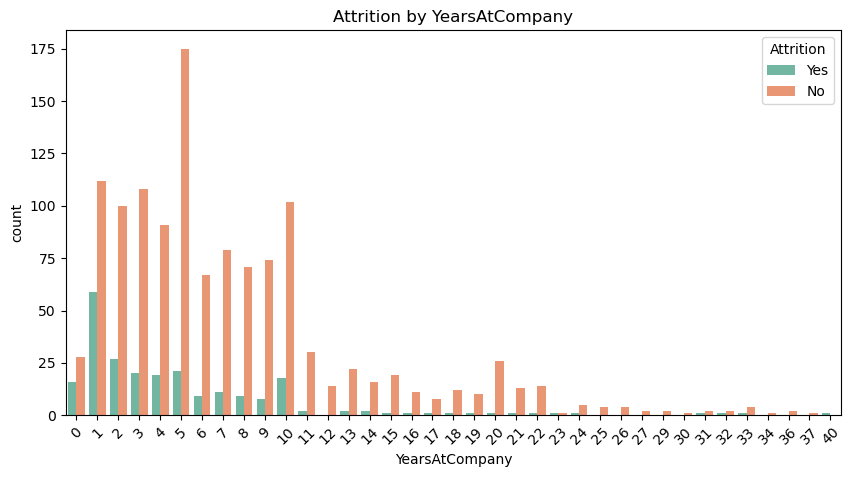

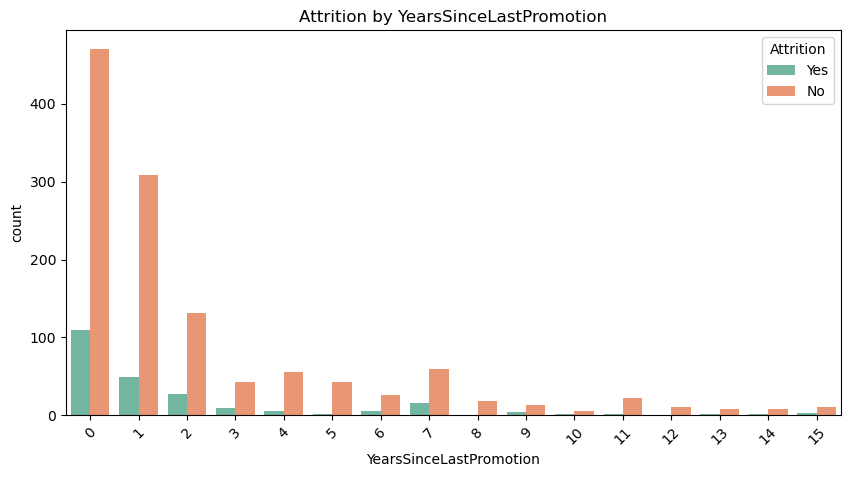

In [56]:
# Checking common categorical variables
# Categorical columns distribution
categorical_columns = ['Department', 'DistanceFromHome', 'BusinessTravel', 'JobRole', 'Gender', 'MaritalStatus', 'OverTime', 'JobSatisfaction', 'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=attrition_filtered, palette='Set2', hue= 'Attrition', legend=True)
    plt.title(f'Attrition by {col}')
    plt.xticks(rotation=45)
    plt.show()

ANALYSIS:
1. Attrition by Department: The countplot above shows that the attrition is spread across Sales, R&D and HR. R&D has the highest attrition rate.
2. Attrition by DistanceFromHome: Huge number of employees live 1 or 2 units away from the office (very close). Attrition exists in this group, but many also stayed. There isn't a clear trend that employees who live farther are more likely to leave, meaning Distance From Home may not have a strong direct relationship with attrition.
3. Attrition by BusinessTravel: Travel rarely shows the higher attrition. 
4. Attrition by JobRole: Sales Executive, Research Scientist and Laboratory Technicians have higher attrition rate. Laboratory Technician with the highest turnover rate. 
5. Attrition by Gender: This shows that there is a notable difference in employee gender turnover rate, with the Male gender having the highest attrition rate.
6. Attrition by Marital Status: The higher attrition rate is the Single group, which possibly infer potential life stage influences.
7. Attrition by OverTime: Employees who work overtime have a much higher count of leavers, so overtime seems positively related to attrition. Majority of employees who don’t work overtime did not leave. Employees who work overtime are significantly more likely to leave the organization. This might indicate burnout, poor work-life balance, or job dissatisfaction among those doing extra hours.
8. Attrition by JobSatisfaction: While lower satisfaction levels generally align with higher attrition, the data result reveals an interesting twist: the highest attrition count appears among employees who rated their job satisfaction at the highest level (4). This suggests that job satisfaction alone is not a strong predictor of attrition, and that other factors (like overtime, pay, or personal reasons) may influence an employee’s decision to leave, even if they feel satisfied at work. There might also be a bias or mismatch: Employees could be rating their jobs well on paper, but still leave due to other pressures.
9. Attrition by WorkLifeBalance: Employees with a better work-life balance, especially at level 4 appear to be less likely to leave the company. Level 3 seems to be a critical point where a high number of employees exist, but also a significant portion stayed, indicating a potential area for improvement.

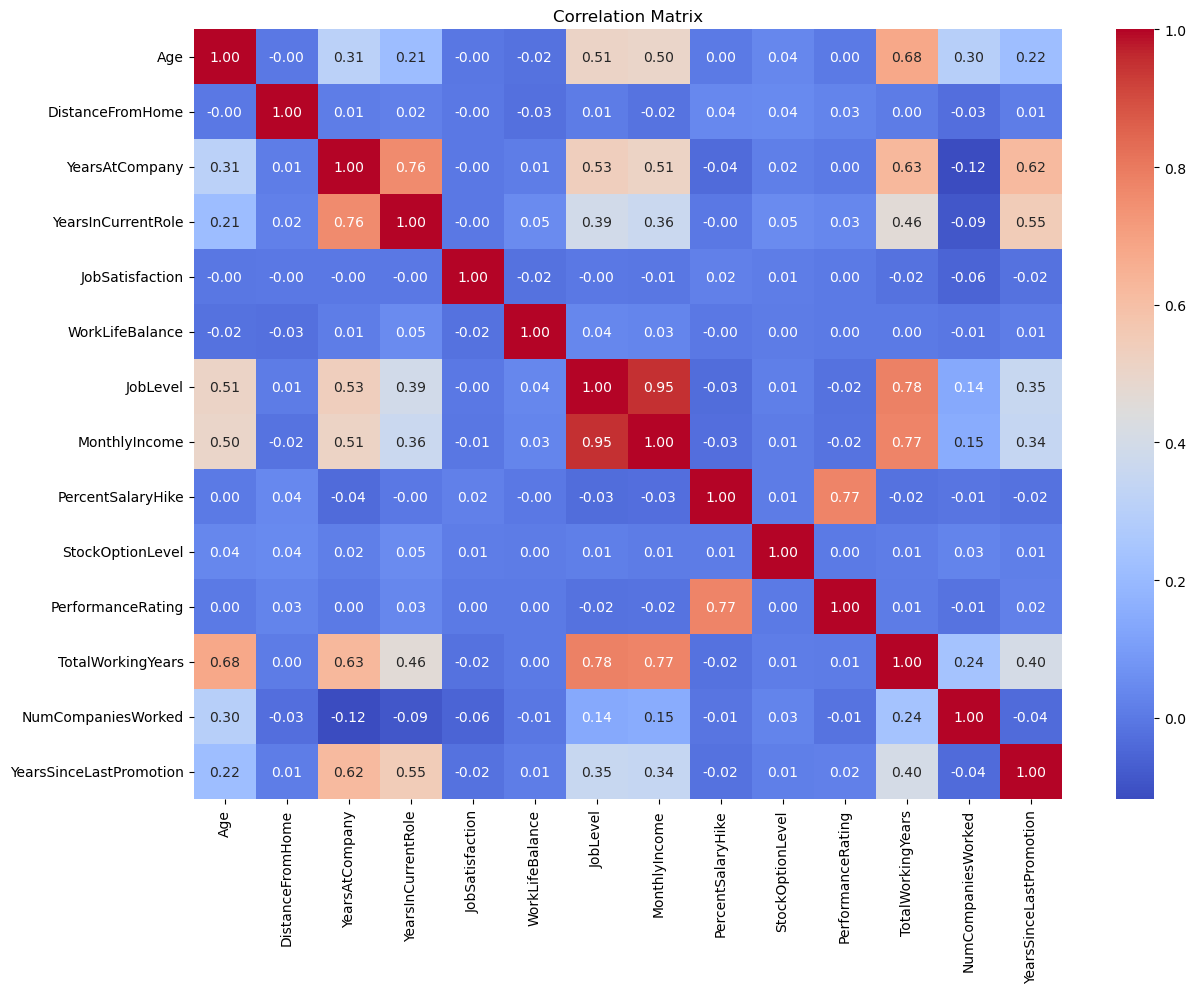

In [57]:
# Correlation matrix (Bivariate - Numerical)
# I will now check the correlation between the numerical variables
plt.figure(figsize=(14, 10))
sns.heatmap(attrition_filtered.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
# The correlation matrix shows that there is a strong correlation between 'YearsAtCompany' and 'TotalWorkingYears'

Strong Positive Correlations (r > 0.7)
These pairs move together in the same direction:
JobLevel & MonthlyIncome (r = 0.95): Higher job levels are strongly associated with higher income.
YearsAtCompany & YearsInCurrentRole (r = 0.76): Employees tend to stay in the same role as long as they stay at the company.
JobLevel & TotalWorkingYears (r = 0.78): More experienced employees tend to have higher job levels.
MonthlyIncome & TotalWorkingYears (r = 0.77): The longer someone has worked, the more they typically earn.
PercentSalaryHike & PerformanceRating (r = 0.77): Salary hikes are strongly linked with performance evaluations.

Moderate Positive Correlations (0.3 < r < 0.7)
Relationship that exists but not very strong:
Age & TotalWorkingYears (r = 0.68): Older employees have typically worked more years.
Age & JobLevel / MonthlyIncome (r ≈ 0.5): Older employees tend to earn more and be at higher job levels.
YearsAtCompany & TotalWorkingYears (r = 0.63): Expected, as longer company tenure contributes to total experience.

Insights:
Income, Job Level, and Experience are tightly linked.
Performance rating heavily influences salary hikes.
Satisfaction and work-life balance appear to be independent of most demographic or job variables.

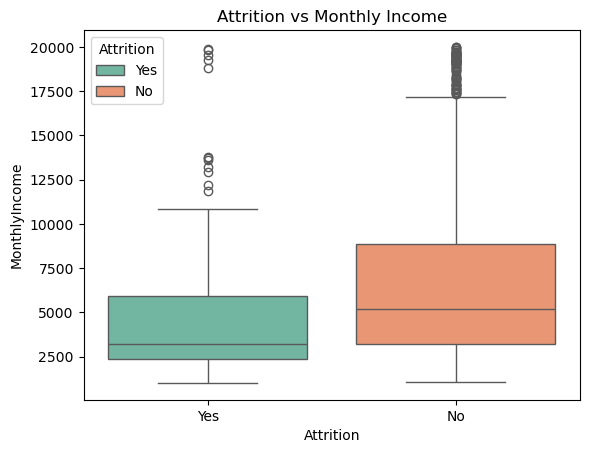

In [58]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=attrition_filtered, palette='Set2', hue='Attrition', legend=True)
plt.title('Attrition vs Monthly Income')
plt.show()

ANALYSIS: 
Attrition = Yes (Employees who left)
Median: Around 3000
Interquartile Range (IQR): From 2000 to 6000, meaning the middle 50% of incomes fall in this range.
Minimum: Around 1000
Maximum: Around 11000
Outliers: Several points above 11000, with the highest around ~19500. These represent a small number of high-income employees who also left the company.
Mean: Likely slightly higher than the median, but still below that of the “No” group, due to the influence of the upper outliers.

Attrition = No (Employees who stayed)
Median: Around 5000–5500
IQR: Wider, spanning approximately 3000 to 9000
Minimum: Just above 1000, similar to the “Yes” group
Maximum: Whisker goes up to around 18000, with many outliers beyond that (up to nearly 20000)
Outliers: Significantly more than the "Yes" group, indicating a higher presence of very high-income employees who remained.
Mean: Likely well above the median, due to the large number of high-end outliers.

This analysis indicates a clear income disparity between employees who stay versus those who leave. The median and mean monthly incomes are significantly higher among retained staff, and there is a greater range of income among them. This highlights compensation as a potential driver of attrition—particularly among lower-income brackets.





In [59]:
# This is to check the JobSatisfaction distribution weighted by attrition
satisfaction_attrition = attrition_filtered.groupby(['JobSatisfaction', 'Attrition']).size().unstack()

# Attrition rate per satisfaction level
satisfaction_attrition['AttritionRate'] = satisfaction_attrition['Yes'] / (satisfaction_attrition['Yes'] + satisfaction_attrition['No'])*100
print(satisfaction_attrition)


Attrition         No  Yes  AttritionRate
JobSatisfaction                         
1                223   66      22.837370
2                234   46      16.428571
3                369   73      16.515837
4                407   52      11.328976


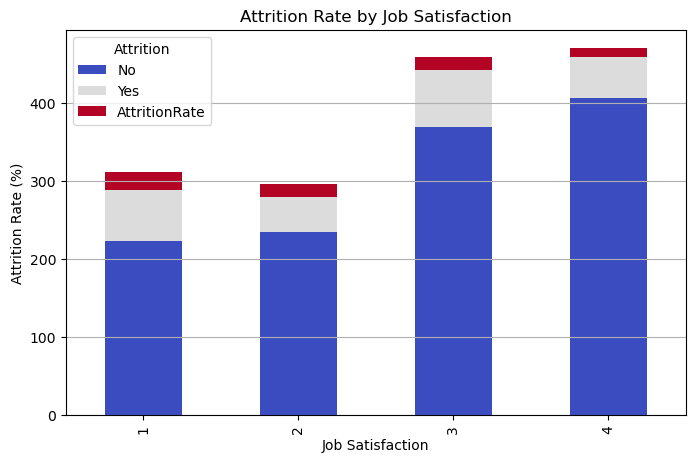

In [60]:
satisfaction_attrition.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title('Attrition Rate by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition Rate (%)')
plt.legend(title='Attrition')
plt.grid(axis='y')
plt.show()

ANALYSIS: As job satisfaction increases, attrition decreases.
Employees with low satisfaction (levels 1 & 2) have the highest attrition rates.
Those with high satisfaction (level 4) show the lowest likelihood of leaving.

Insight: Boosting job satisfaction is a strategic lever for improving employee retention.

In [61]:
# This is to check the JobRole distribution weighted by attrition
Role_attrition = attrition_filtered.groupby(['JobRole', 'Attrition']).size().unstack()

# Attrition rate per JobRole level
Role_attrition['AttritionRate'] = Role_attrition['Yes'] / (Role_attrition['Yes'] + Role_attrition['No']) * 100
print(Role_attrition)

Attrition                   No  Yes  AttritionRate
JobRole                                           
Healthcare Representative  122    9       6.870229
Human Resources             40   12      23.076923
Laboratory Technician      197   62      23.938224
Manager                     97    5       4.901961
Manufacturing Director     135   10       6.896552
Research Director           78    2       2.500000
Research Scientist         245   47      16.095890
Sales Executive            269   57      17.484663
Sales Representative        50   33      39.759036


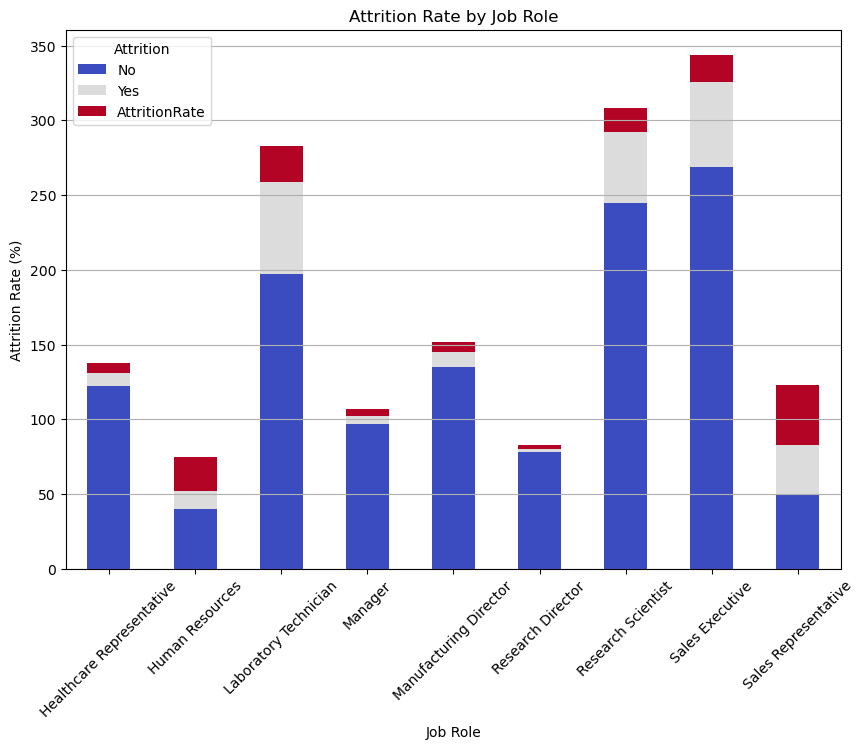

In [62]:
Role_attrition.plot(kind='bar', stacked=True, figsize=(10,7), colormap='coolwarm')
plt.title('Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.grid(axis='y')
plt.show()

ANALYSIS: 
Highest Attrition Roles: Sales Executive and Research Scientist show the highest attrition rates, with a large portion of their bars in gray (left) and red (highlighted attrition). Sales Representative also shows a notably high attrition percentage, despite fewer total employees.

Moderate Attrition Roles: Laboratory Technicians and Healthcare Representatives have moderate attrition, suggesting some turnover concerns in technical and field roles.

Lowest Attrition Roles: Managers, Manufacturing Directors, and Research Directors show the lowest attrition rates, with very small gray/red segments. These roles appear to retain employees well.

Notable Outlier: Human Resources has a relatively low headcount but a high attrition rate proportionately. While not a large group, it may indicate internal dissatisfaction or external opportunities.

In [63]:
# This is to check the YearsSinceLastPromotion distribution weighted by attrition
promotion_attrition = attrition_filtered.groupby(['YearsSinceLastPromotion', 'Attrition']).size().unstack()

# Attrition rate per satisfaction level
promotion_attrition['AttritionRate'] = promotion_attrition['Yes'] / (promotion_attrition['Yes'] + promotion_attrition['No'])*100
print(promotion_attrition)

Attrition                   No    Yes  AttritionRate
YearsSinceLastPromotion                             
0                        471.0  110.0      18.932874
1                        308.0   49.0      13.725490
2                        132.0   27.0      16.981132
3                         43.0    9.0      17.307692
4                         56.0    5.0       8.196721
5                         43.0    2.0       4.444444
6                         26.0    6.0      18.750000
7                         60.0   16.0      21.052632
8                         18.0    NaN            NaN
9                         13.0    4.0      23.529412
10                         5.0    1.0      16.666667
11                        22.0    2.0       8.333333
12                        10.0    NaN            NaN
13                         8.0    2.0      20.000000
14                         8.0    1.0      11.111111
15                        10.0    3.0      23.076923


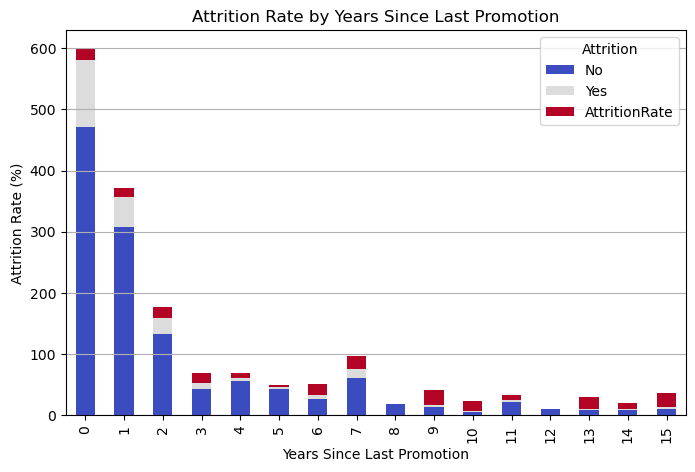

In [64]:
promotion_attrition.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title('Attrition Rate by Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Attrition Rate (%)')
plt.legend(title='Attrition')
plt.grid(axis='y')
plt.show()

ANALYSIS: 
Highest Attrition Occurs Within the First 1-2 Years After a Promotion: Year 0 (recently promoted) and Year 1 show the highest attrition counts and also a notable red bar, indicating high attrition rates. Employees might leave due to unmet expectations post-promotion or if the promotion didn’t come with desired benefits.

Sharp Decline in Attrition After Year 2: There’s a significant drop in both the number of employees leaving and the attrition rate from Year 3 onwards. This suggests that employees who stay longer after a promotion are less likely to leave.

Stabilization from Year 4 to 15: From Year 4 onward, both attrition counts and attrition rates are relatively low and stable. These employees may be more loyal or satisfied, possibly due to job security, engagement, or tenure benefits.

Anomaly at Year 7: A slight spike in attrition around Year 7 might signal dissatisfaction from prolonged stagnation (i.e., no promotion in 7 years).